In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import diffusions as func
import PM_1D_dirichlet as D1
import PM_2D_dirichlet as D2

In [3]:
from schemes import diffX1D

## 2D

In [65]:
def f(x, alpha, scale = 0.1):
    first = 5-np.tanh(alpha*(x-1/6))-np.tanh(alpha*(x-2/6))
    second = np.tanh(alpha*(x-4/6)) + np.tanh(alpha*(x-5/6)) + scale*(np.sin(25*x))**2*np.sin(300*x)
    return first + second

dt < :  1.9920239361596167e-06
Endtime:  0.1


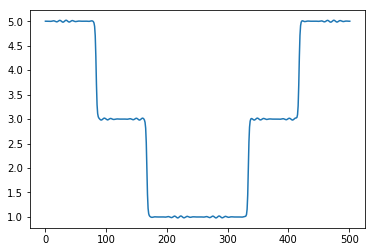

In [99]:
M = 500

x = np.linspace(0, 1, M+2)
# x = np.linspace(0, 6, M+2)

dx = 1/(M+1)

print("dt < : ", 1/(2/dx**2))

T = 100
dt = 1e-3

x = np.linspace(0, 1, M+2)
u0 = f(x, 300, scale = 0.02)
# x = np.linspace(0, 6, M+2)
# u0 = D1.f(x, 30, scale = 0.2)

# u0 = D1.generate_random1D(M, scale = 10)
print("Endtime: ", T * dt)

plt.plot(u0)

In [100]:
funcname = "rational"
g = func.choose_function(funcname, c = 1)
U_rat = D1.solve_BE(u0, g, M, T, dt)

In [101]:
# funcname = "exponential"
# g = func.choose_function(funcname, c = 10)
# U_exp = D1.solve_BE(u0, g, M, T, dt)

In [102]:
funcname = "weickert"
g = func.choose_function(funcname, c = 1)
U_weick = D1.solve_BE(u0, g, M, T, dt)

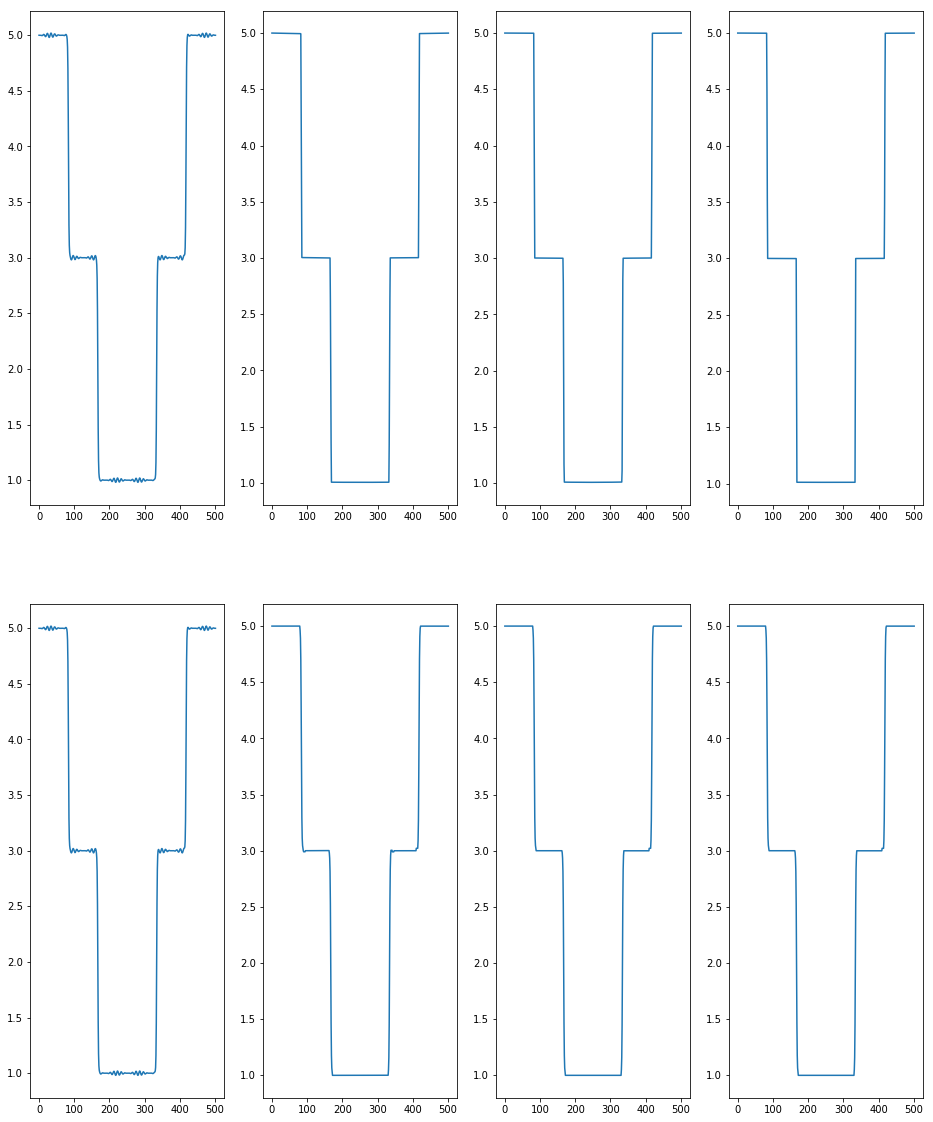

In [103]:
plt.figure(figsize = (16, 20))

plt.subplot(241)
plt.plot(U_rat[0])
plt.subplot(242)
plt.plot(U_rat[T//3])
plt.subplot(243)
plt.plot(U_rat[2*T//3])
plt.subplot(2,4,4)
plt.plot(U_rat[-1])

# plt.subplot(432)
# plt.plot(U_exp[0])
# plt.subplot(435)
# plt.plot(U_exp[T//3])
# plt.subplot(438)
# plt.plot(U_exp[2*T//3])
# plt.subplot(4, 3, 11)
# plt.plot(U_exp[-1])

plt.subplot(245)
plt.plot(U_weick[0])
plt.subplot(246)
plt.plot(U_weick[T//3])
plt.subplot(247)
plt.plot(U_weick[2*T//3])
plt.subplot(2, 4, 8)
plt.plot(U_weick[-1])

# plt.show()

plt.savefig("./figures/compare_diffusions.png")

## Diff Functions

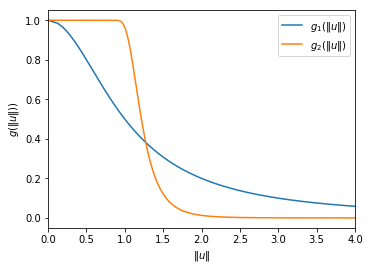

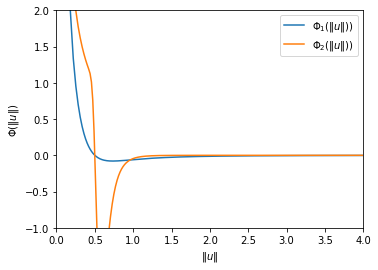

In [9]:
M = 999
domain = (0, 16)
s = np.linspace(*domain, M+2)
Dx = diffX1D(M, domain)

plt.figure(figsize = (5.5, 4))
# plt.subplot(121)
plt.plot(s**(1/2), func.rational(c = 1)(s), label = r"$g_1 \left( \Vert u \Vert \right)$")
# plt.plot(s, func.exponential(c = 1)(s**(1/2)), label = "Exponential")
plt.plot(s**(1/2), func.weickert(c = 1)(s), label = r"$g_2 \left( \Vert u \Vert \right)$")
plt.legend()
plt.xlim(domain[0]**(1/2), domain[1]**(1/2))
plt.xlabel(r"$\Vert u \Vert$")
plt.ylabel(r"$g\left(\Vert u \Vert)\right)$")
plt.legend()
plt.savefig("./figures/diffusion_a.png")


plt.figure(figsize = (5.5, 4))
plt.plot(s**(1/2), Dx.dot(func.flux(func.rational, c = 0.5)(s)), label = r"$\Phi_1 \left( \Vert u \Vert \right))$")
# plt.plot(s, Dx.dot(func.flux(func.exponential, c = 1)(s)**(1/2)), label = r"exponential")
plt.plot(s**(1/2), Dx.dot(func.flux(func.weickert, c = 0.5)(s)), label = r"$\Phi_2 \left( \Vert u \Vert \right))$")
plt.ylim(-1, 2)
plt.xlim(domain[0]**(1/2), domain[1]**(1/2))
plt.xlabel(r"$\Vert u \Vert$")
plt.ylabel(r"$\Phi \left( \Vert u \Vert \right)$")

plt.legend()
plt.savefig("./figures/diffusion_b.png")

plt.show()

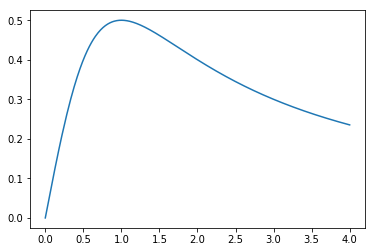

In [10]:
plt.plot(s**(1/2), func.flux(func.rational, 1)(s))

## 2D